<a href="https://colab.research.google.com/github/JaeYeonBang/ML_regression/blob/main/regression-house-prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import sys

import math

%matplotlib inline

In [2]:
!pip install pycaret

In [3]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"jaeyeonbang","key":"18b04a1488a2e8a9ca8eda435a8fe67c"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         58           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         89           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge       1189           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        164           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1989           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14289           False  
house-pr

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data_description.txt    
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


In [7]:
!ls

 data_description.txt				   sample_data
 house-prices-advanced-regression-techniques.zip   sample_submission.csv
'kaggle (1).json'				   test.csv
 kaggle.json					   train.csv
 logs.log


In [8]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
sub =  pd.read_csv('./sample_submission.csv')

In [9]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
df_train.drop('Id', axis = 1 , inplace = True)
df_test.drop('Id', axis = 1 , inplace = True)
df_train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

## Data preparing

In [11]:
CATEGORICAL_FEATURES_NAMES = []
NUMERIC_FEATURES_NAMES = []


for i, dtype in enumerate(df_train.dtypes):
    if dtype == 'float64' or dtype == 'int64':
        NUMERIC_FEATURES_NAMES.append(df_train.dtypes.index[i])
    elif dtype == 'object':
        CATEGORICAL_FEATURES_NAMES.append(df_train.dtypes.index[i])
print("numeric features : ", NUMERIC_FEATURES_NAMES)
print("categorical features : ", CATEGORICAL_FEATURES_NAMES)

numeric features :  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
categorical features :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

In [12]:
CATEGORICAL_FEATURES_NAMES.append('MSSubClass')
NUMERIC_FEATURES_NAMES.remove('MSSubClass')
NUMERIC_FEATURES_NAMES.remove('SalePrice')
TARGET_FEATURE_NAME = 'SalePrice' 

In [13]:
df_train[CATEGORICAL_FEATURES_NAMES] = df_train[CATEGORICAL_FEATURES_NAMES].astype("category")

In [14]:
df_test[CATEGORICAL_FEATURES_NAMES] = df_test[CATEGORICAL_FEATURES_NAMES].astype("category")


In [15]:
sys.getsizeof(df_test)

496415

Text(0.5, 1.0, 'SalePrice distribution')

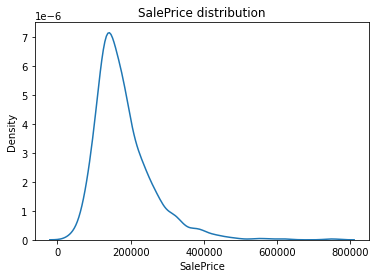

In [16]:
 sns.kdeplot(data = df_train[TARGET_FEATURE_NAME]).set_title('SalePrice distribution')

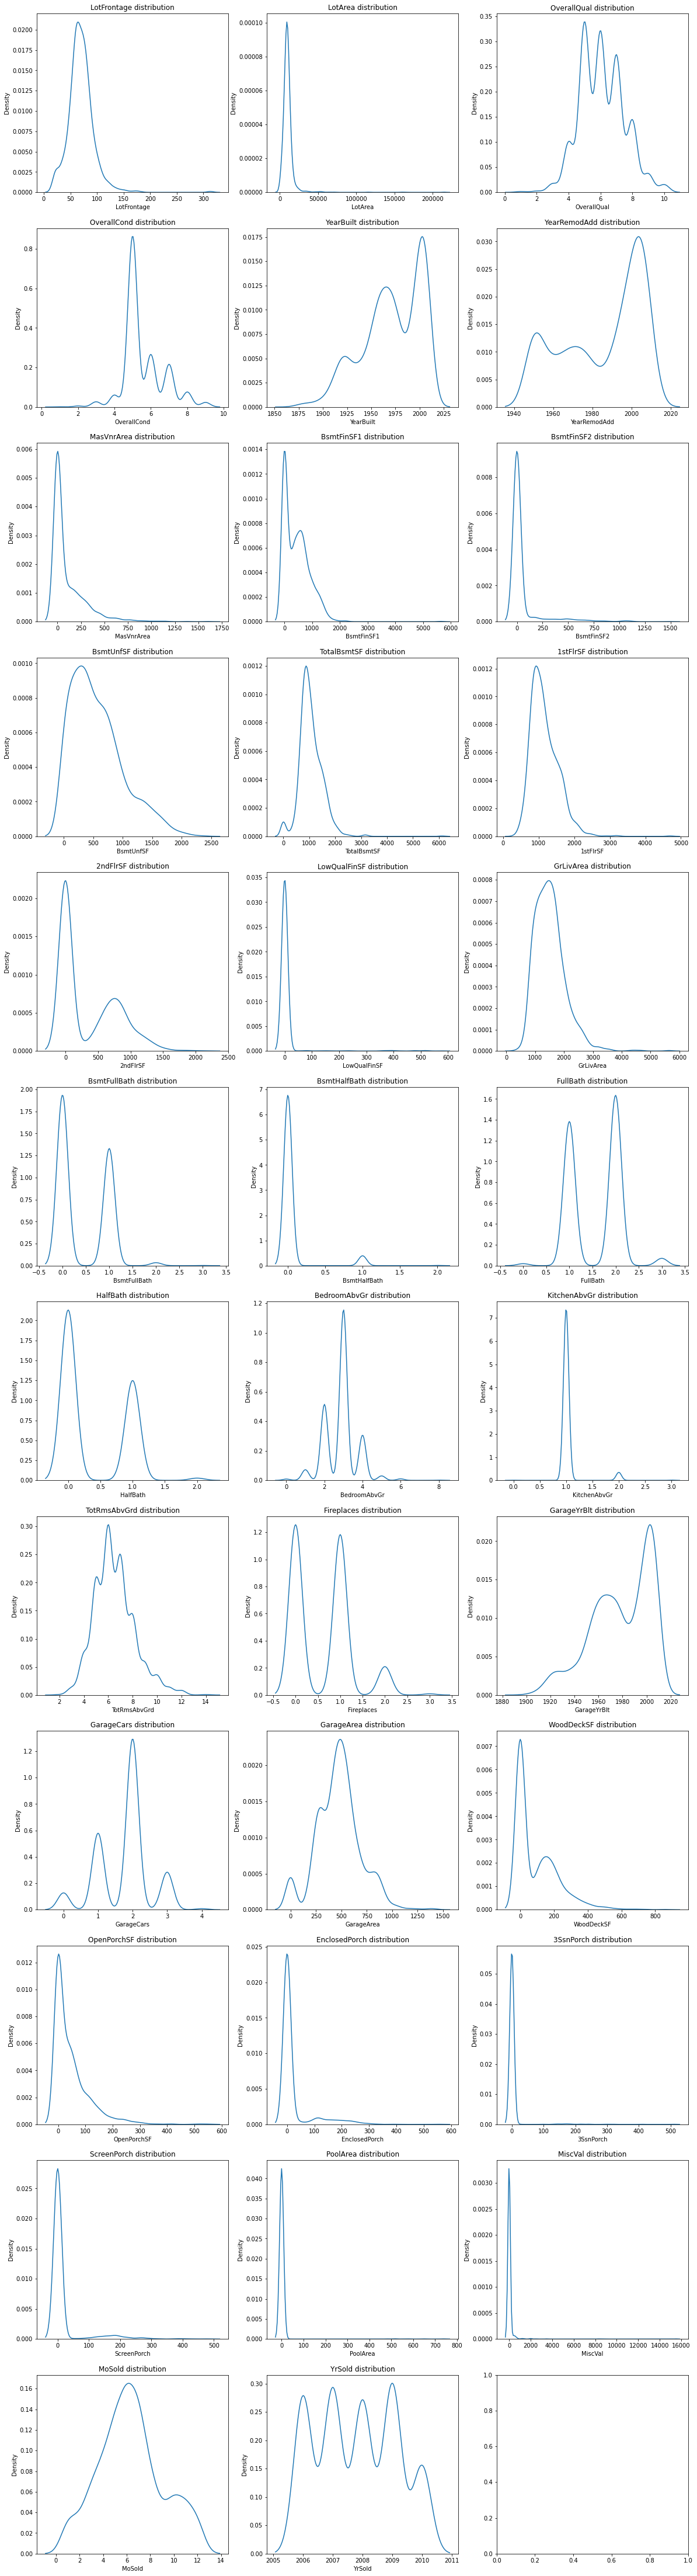

In [17]:
def show_numeric_distribution (data = None, FEATURES_NAME = None, target = None, row = 0, col = 0, figsize = (18, 18), ):

    fig, ax = plt.subplots(row,col, figsize = figsize)
    for i, feature in enumerate( FEATURES_NAME):
        sns.kdeplot(data = data[feature], ax = ax[math.floor(i/col), i%col]).set_title(f'{feature} distribution')
    fig.show()

show_numeric_distribution(data = df_train, target = TARGET_FEATURE_NAME, FEATURES_NAME = NUMERIC_FEATURES_NAMES,\
                      row =  len(NUMERIC_FEATURES_NAMES)//3 + 1, col = 3, figsize = (20, 80)) 

In [18]:
# for feature in NUMERIC_FEATURES_NAMES:
#     if abs(df_train[feature].skew()) > 0.5:
#         NEED_TO_BE_LOGGED_FEATURES_NAMES.append(feature)
    

In [19]:
# NEED_TO_BE_LOGGED_FEATURES_NAMES

In [20]:
# df_train_logged =  df_train
# df_train[TARGET_FEATURE_NAME] = np.log1p(df_train[TARGET_FEATURE_NAME])
# for features in NEED_TO_BE_LOGGED_FEATURES_NAMES : 
#     df_train_logged[features] = np.log1p(df_train[features])

In [21]:
# show_numeric_distribution(data = df_train_logged, target = TARGET_FEATURE_NAME, FEATURES_NAME = NUMERIC_FEATURES_NAMES,\
#                       row =  len(NUMERIC_FEATURES_NAMES)//3 + 1, col = 3, figsize = (20, 80)) 

In [22]:
df_train[TARGET_FEATURE_NAME] = np.log1p(df_train[TARGET_FEATURE_NAME])

Text(0.5, 1.0, 'SalePrice distribution')

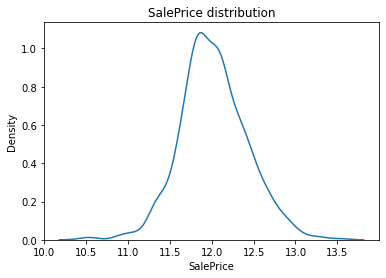

In [23]:
 sns.kdeplot(data = df_train[TARGET_FEATURE_NAME]).set_title('SalePrice distribution')

In [24]:
# from sklearn.preprocessing import MinMaxScaler
# scaler =  MinMaxScaler()
# fitted = scaler.fit(df_train[NUMERIC_FEATURES_NAMES])
# normalized_np_train=scaler.transform(df_train[NUMERIC_FEATURES_NAMES])
# normalized_df_train = pd.DataFrame(normalized_np_train)
# normalized_df_train.head(3)

In [25]:
def max_min_scaler(df, FEATURES):
  temp = df
  temp[FEATURES] = (temp[FEATURES] - temp[FEATURES].min()) / (temp[FEATURES].max() - temp[FEATURES].min())
  return temp
df_train_scaled = max_min_scaler(df_train , NUMERIC_FEATURES_NAMES)
df_train_scaled = max_min_scaler(df_train , 'SalePrice')
df_train_scaled.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,0.150685,0.033420,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,0.090909,0.50,WD,Normal,0.581428
1,20,RL,0.202055,0.038795,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,NaN,NaN,NaN,0.0,0.363636,0.25,WD,Normal,0.536316
2,60,RL,0.160959,0.046507,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,NaN,NaN,NaN,0.0,0.727273,0.50,WD,Normal,0.604026


In [26]:
df_train[NUMERIC_FEATURES_NAMES].columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

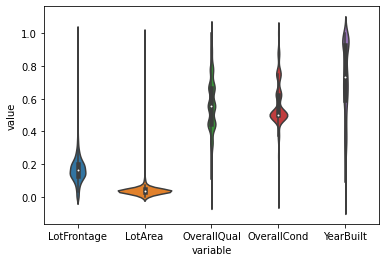

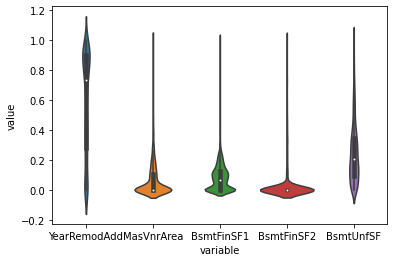

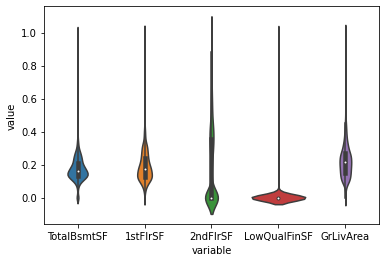

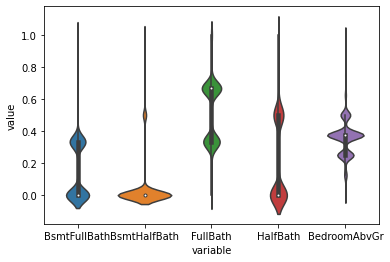

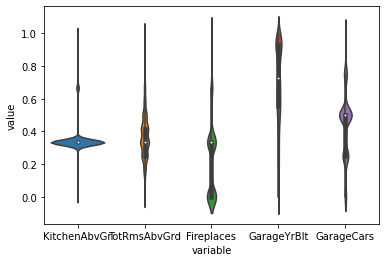

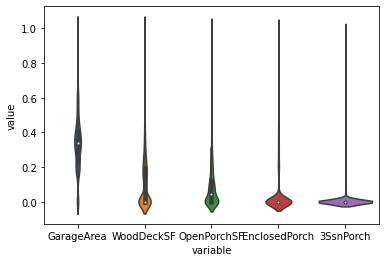

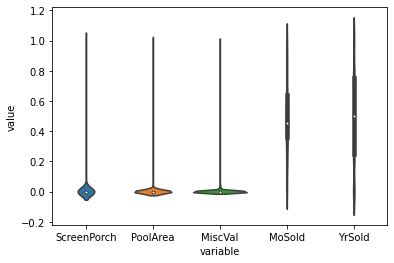

In [27]:
def show_swarmplots(data = None, col = 5, FEATURES_NAME = None, figsize = (30, 30)):
  temp = data[FEATURES_NAME]
  len_num = len(temp.columns)
  i = 0
  while i < len_num:
  
    sns.violinplot(x="variable", y="value", data=pd.melt(temp.iloc[: , i : i+col]))
    i += col
    plt.show()

show_swarmplots(data = df_train ,col = 5, FEATURES_NAME = NUMERIC_FEATURES_NAMES, figsize = (18, 18))

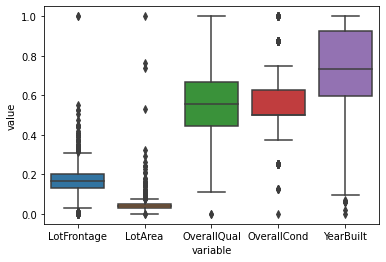

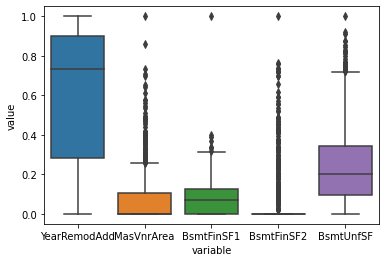

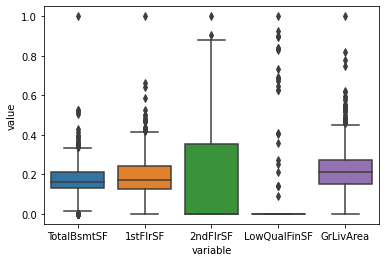

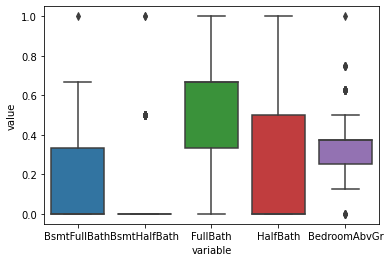

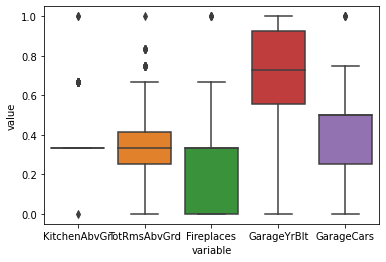

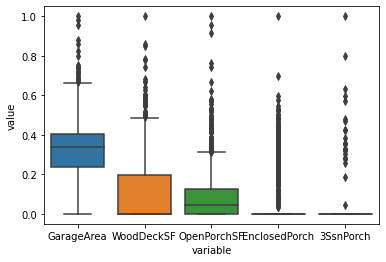

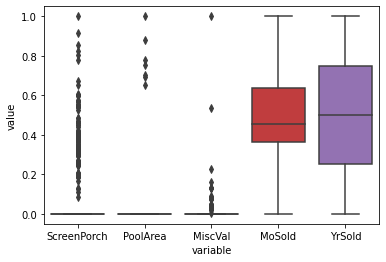

In [28]:
def show_boxplots(data = None, col = 5, FEATURES_NAME = None, figsize = (30, 30)):
  temp = data[FEATURES_NAME]
  len_num = len(temp.columns)
  i = 0
  while i < len_num:
    
    sns.boxplot(x="variable", y="value", data=pd.melt(temp.iloc[: , i : i+col]))
    i += col
    plt.show()

show_boxplots(data = df_train ,col = 5, FEATURES_NAME = NUMERIC_FEATURES_NAMES, figsize = (18, 18))

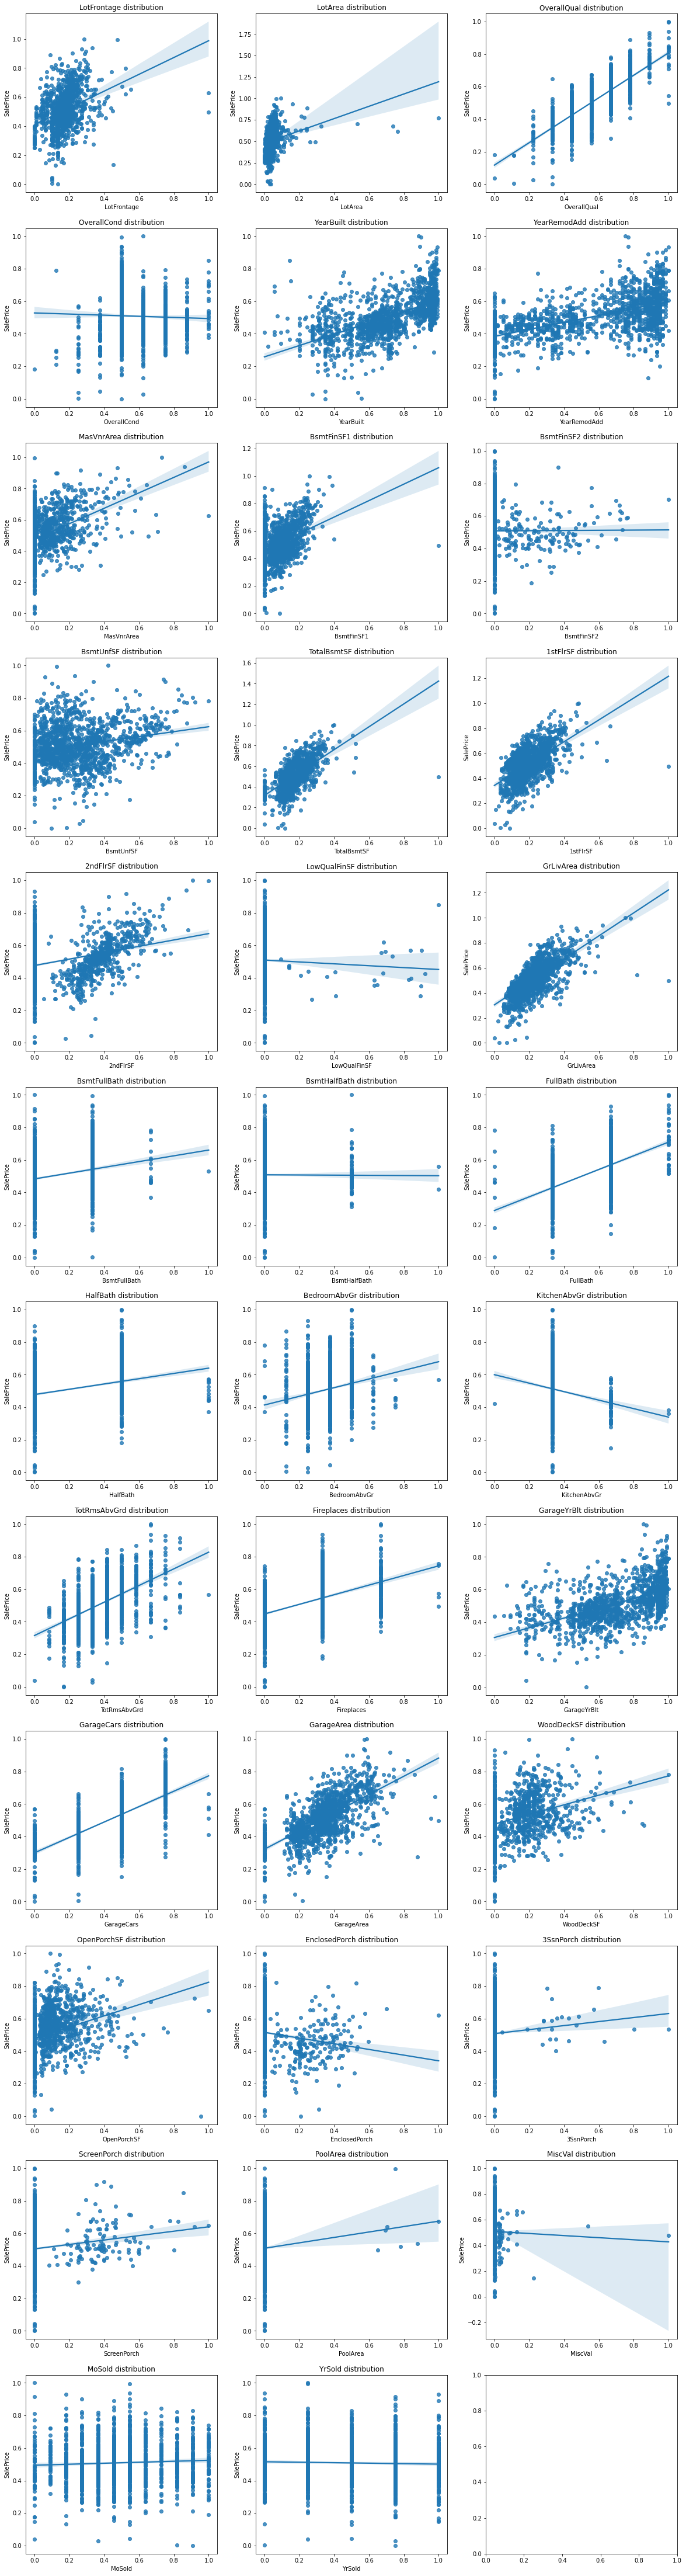

In [29]:
def show_regression_plots (data = None, FEATURES_NAME = None, target = None, row = 0, col = 0, figsize = (18, 18) ):

    fig, ax = plt.subplots(row,col, figsize = figsize)
    for i, feature in enumerate( FEATURES_NAME):
        sns.regplot(x = feature, y = target ,data = data, ax = ax[math.floor(i/col), i%col]).set_title(f'{feature} distribution')
    fig.show()

show_regression_plots(data = df_train, target = TARGET_FEATURE_NAME, FEATURES_NAME = NUMERIC_FEATURES_NAMES,\
                      row =  len(NUMERIC_FEATURES_NAMES)//3 + 1 , col = 3, figsize = (20, 80)) 

### processing NAN

In [30]:
df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)
missing_train_data = pd.DataFrame({'Missing Ratio' :df_train_na})
missing_train_data.head(20)



,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [31]:
categorical_missing_train_data = missing_train_data[df_train[missing_train_data.index].dtypes == 'category']
numeric_missing_train_data = missing_train_data[df_train[missing_train_data.index].dtypes != 'category']

In [32]:
categorical_missing_train_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945
GarageCond,5.547945
BsmtExposure,2.602740


In [33]:
def fill_na_with_none_category(df,  FEATURES, categorical_missing_data):
  for feature in FEATURES:
    df[feature].cat.add_categories('None',inplace = True)
    df[feature].fillna('None', inplace = True)
    categorical_missing_data.drop(feature,inplace = True)
 

fill_na_with_none_category(df_train, ['PoolQC', 'MiscFeature', 'Alley', 'Fence' , 'FireplaceQu'], categorical_missing_train_data )

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
def fill_na_with_mode_category(df, FEATURES , categorical_missing_data):
  for feature in FEATURES:
    df[feature].fillna(df[feature].mode()[0], inplace = True)

    categorical_missing_data.drop(feature,inplace = True)

fill_na_with_mode_category(df_train, categorical_missing_train_data.index, categorical_missing_train_data)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
categorical_missing_train_data

,Missing Ratio


In [36]:
numeric_missing_train_data

,Missing Ratio
LotFrontage,17.739726
GarageYrBlt,5.547945
MasVnrArea,0.547945


In [37]:
def fill_na_with_mode_numeric(df, FEATURES, numeric_missing_data ):
  for feature in FEATURES:
    df[feature].fillna(df[feature].mode()[0], inplace = True)
    
    numeric_missing_data.drop(feature,inplace = True)

fill_na_with_mode_numeric(df_train, numeric_missing_train_data.index, numeric_missing_train_data)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
df_test_na = (df_test.isnull().sum() / len(df_test)) * 100
df_test_na = df_test_na.drop(df_test_na[df_test_na == 0].index).sort_values(ascending=False)
missing_test_data = pd.DataFrame({'Missing Ratio' :df_test_na})
missing_test_data.head(20)

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageYrBlt,5.346127
GarageQual,5.346127
GarageFinish,5.346127


In [39]:
categorical_missing_test_data = missing_test_data[df_train[missing_test_data.index].dtypes == 'category']
numeric_missing_test_data = missing_test_data[df_train[missing_test_data.index].dtypes != 'category']

In [40]:
categorical_missing_test_data

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127
GarageType,5.209047
BsmtCond,3.084304


In [41]:
fill_na_with_none_category(df_test, ['PoolQC', 'MiscFeature', 'Alley', 'Fence' , 'FireplaceQu'], categorical_missing_test_data )
fill_na_with_mode_category(df_test, categorical_missing_test_data.index, categorical_missing_test_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
numeric_missing_test_data

,Missing Ratio
LotFrontage,15.558602
GarageYrBlt,5.346127
MasVnrArea,1.028101
BsmtFullBath,0.137080
BsmtHalfBath,0.137080
GarageCars,0.068540
GarageArea,0.068540
TotalBsmtSF,0.068540
BsmtUnfSF,0.068540
BsmtFinSF2,0.068540


In [43]:
fill_na_with_mode_numeric(df_test, numeric_missing_test_data.index, numeric_missing_test_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
# for feature in HAVE_NA_FEATURES.index: 
#     print(feature)
#     df_train[feature].fillna(df_train[feature].mode()[0], inplace = True)

In [45]:
# for feature in HAVE_NA_FEATURES.index: 
#     print(feature)
#     df_test[feature].fillna(df_test[feature].mode()[0], inplace = True)

In [46]:
df_train.isna().sum().sum()

0

In [47]:
df_test.isna().sum().sum()

0

In [48]:
def get_dummy (df_features , CATEGORICAL_FEATURES_NAME):
    for features in CATEGORICAL_FEATURES_NAME:
        df_features[features] = df_features[features].astype(str)
    df_features_processed = pd.get_dummies(df_features ,CATEGORICAL_FEATURES_NAME)
    return df_features_processed

df_train_processed = get_dummy(df_train, CATEGORICAL_FEATURES_NAMES)
df_test_processed = get_dummy(df_test, CATEGORICAL_FEATURES_NAMES)

## Anomaly detection

In [49]:
from pycaret.anomaly import *
setup = setup(df_train, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(1460, 80)"
2,Missing Values,False
3,Numeric Features,36
4,Categorical Features,44
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1460, 308)"
9,CPU Jobs,-1


In [50]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [51]:
iforest = create_model('iforest')



In [52]:
knn = create_model('knn')

In [53]:
lof = create_model('lof')

In [54]:
print(iforest)


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [55]:
iforest_results = assign_model(iforest)
iforest_results[(iforest_results['Anomaly'] == 1)].index

Int64Index([   8,   30,   52,   53,   58,   87,   88,   93,   98,  113,  185,
             187,  188,  197,  246,  249,  264,  291,  328,  335,  349,  352,
             358,  375,  383,  398,  417,  488,  523,  533,  568,  586,  630,
             635,  636,  664,  666,  676,  705,  740,  747,  769,  803,  809,
             812,  821,  828,  883,  888,  944,  954,  991, 1000, 1013, 1100,
            1163, 1181, 1182, 1186, 1228, 1230, 1248, 1266, 1275, 1298, 1317,
            1328, 1337, 1380, 1386, 1387, 1405, 1423],
           dtype='int64')

In [56]:
dropping_index = iforest_results[(iforest_results['Anomaly'] == 1)].index
df_train_processed = iforest_results.drop(dropping_index)
df_train_processed.drop(columns = ['Anomaly','Anomaly_Score'], inplace = True)
df_train_processed.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,0.150685,0.033420,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.000000,0.090909,0.50,WD,Normal,0.581428
1,20,RL,0.202055,0.038795,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.000000,0.363636,0.25,WD,Normal,0.536316
2,60,RL,0.160959,0.046507,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.000000,0.727273,0.50,WD,Normal,0.604026
3,70,RL,0.133562,0.038561,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.000000,0.090909,0.00,WD,Abnorml,0.451868
4,60,RL,0.215753,0.060576,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.000000,1.000000,0.50,WD,Normal,0.640475
5,50,RL,0.219178,0.059899,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,MnPrv,Shed,0.045161,0.818182,0.75,WD,Normal,0.458765
6,20,RL,0.184932,0.041057,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.000000,0.636364,0.25,WD,Normal,0.707284
7,60,RL,0.133562,0.042450,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,Shed,0.022581,0.909091,0.75,WD,Normal,0.567889
9,190,RL,0.099315,0.028605,Pave,None,Reg,Lvl,AllPub,Corner,...,0.0,None,None,None,0.000000,0.000000,0.50,WD,Normal,0.396258
10,20,RL,0.167808,0.046274,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.000000,0.090909,0.50,WD,Normal,0.426508


In [57]:
lof_results = assign_model(lof)
lof_results.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Anomaly,Anomaly_Score
0,60,RL,0.150685,0.033420,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0.0,0.090909,0.50,WD,Normal,0.581428,0,0.981306
1,20,RL,0.202055,0.038795,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,0.0,0.363636,0.25,WD,Normal,0.536316,0,1.113641
2,60,RL,0.160959,0.046507,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0.0,0.727273,0.50,WD,Normal,0.604026,0,0.993691
3,70,RL,0.133562,0.038561,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0.0,0.090909,0.00,WD,Abnorml,0.451868,0,1.114054
4,60,RL,0.215753,0.060576,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,0.0,1.000000,0.50,WD,Normal,0.640475,0,1.023582


In [58]:
knn_results = assign_model(knn)
knn_results.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Anomaly,Anomaly_Score
0,60,RL,0.150685,0.033420,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0.0,0.090909,0.50,WD,Normal,0.581428,0,1.608993
1,20,RL,0.202055,0.038795,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,0.0,0.363636,0.25,WD,Normal,0.536316,0,4.148718
2,60,RL,0.160959,0.046507,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0.0,0.727273,0.50,WD,Normal,0.604026,0,2.119560
3,70,RL,0.133562,0.038561,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0.0,0.090909,0.00,WD,Abnorml,0.451868,0,4.641332
4,60,RL,0.215753,0.060576,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,0.0,1.000000,0.50,WD,Normal,0.640475,0,2.519641


## MODELING

In [59]:

from scipy.stats import norm, skew #for some statistics
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from pycaret.regression import *

In [60]:

s = setup(
          data = df_train_processed, target= TARGET_FEATURE_NAME, train_size = 0.9, session_id	= 123,
          categorical_features = CATEGORICAL_FEATURES_NAMES,
          numeric_features = NUMERIC_FEATURES_NAMES
          )

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1387, 80)"
3,Missing Values,False
4,Numeric Features,35
5,Categorical Features,44
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1248, 291)"


In [61]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x7f1a08606830>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x7f1a08606b90>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f1a08606b90>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x7f1a0860d050>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


In [62]:

best6 = compare_models(n_select = 6, sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0250,0.0013,0.0360,0.9127,0.0253,0.0945,0.386
ridge,Ridge Regression,0.0253,0.0014,0.0367,0.9094,0.0258,0.1054,0.038
br,Bayesian Ridge,0.0254,0.0014,0.0367,0.9092,0.0259,0.1067,0.113
omp,Orthogonal Matching Pursuit,0.0264,0.0015,0.0384,0.8994,0.0270,0.1063,0.038
gbr,Gradient Boosting Regressor,0.0274,0.0016,0.0399,0.8934,0.0281,0.1240,0.785
lightgbm,Light Gradient Boosting Machine,0.0277,0.0017,0.0408,0.8887,0.0286,0.1252,0.236
rf,Random Forest Regressor,0.0303,0.0020,0.0438,0.8721,0.0304,0.1321,2.458
et,Extra Trees Regressor,0.0304,0.0020,0.0447,0.8662,0.0312,0.1437,2.469
ada,AdaBoost Regressor,0.0403,0.0029,0.0536,0.8091,0.0370,0.1540,0.509
par,Passive Aggressive Regressor,0.0404,0.0029,0.0540,0.8020,0.0370,0.1564,0.035


In [63]:
huber = create_model('huber')
ridge = create_model('ridge')
br = create_model('br')
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0295,0.0017,0.0412,0.8825,0.0292,0.0663
1,0.0311,0.0025,0.0500,0.8624,0.0369,0.1525
2,0.0282,0.0018,0.0429,0.8986,0.0298,0.0664
3,0.0274,0.0018,0.0426,0.8488,0.0284,0.0570
4,0.0266,0.0013,0.0360,0.9210,0.0251,0.0611
5,0.0257,0.0015,0.0387,0.8901,0.0254,0.0515
6,0.0277,0.0016,0.0400,0.9119,0.0277,0.0646
7,0.0230,0.0010,0.0314,0.9026,0.0209,0.0472
8,0.0256,0.0012,0.0347,0.9240,0.0230,0.0519
9,0.0318,0.0025,0.0501,0.8448,0.0393,0.6333


In [64]:
lgbm = tune_model(lightgbm , n_iter = 20, optimize = 'RMSE', early_stopping = True, early_stopping_max_iters = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0386,0.0026,0.0510,0.8206,0.0351,0.0877
1,0.0421,0.0038,0.0617,0.7900,0.0451,0.1922
2,0.0401,0.0034,0.0580,0.8149,0.0394,0.0931
3,0.0346,0.0026,0.0513,0.7812,0.0343,0.0737
4,0.0354,0.0022,0.0472,0.8643,0.0324,0.0818
5,0.0360,0.0022,0.0471,0.8368,0.0306,0.0702
6,0.0462,0.0041,0.0642,0.7735,0.0431,0.1074
7,0.0325,0.0019,0.0433,0.8143,0.0290,0.0696
8,0.0417,0.0031,0.0553,0.8074,0.0359,0.0832
9,0.0392,0.0042,0.0646,0.7419,0.0498,0.7435


In [65]:
huber = tune_model(huber , n_iter = 20, optimize = 'RMSE', early_stopping = True, early_stopping_max_iters = 10)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:47:50
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Huber Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.2s


KeyboardInterrupt: ignored

In [ ]:
ridge = tune_model(ridge , n_iter = 20, optimize = 'RMSE', early_stopping = True, early_stopping_max_iters = 10)

In [ ]:
br = tune_model(br , n_iter = 20, optimize = 'RMSE', early_stopping = True, early_stopping_max_iters = 10)

In [ ]:
blender = blend_models(best6, optimize = 'RMSE')

In [ ]:
stacker = stack_models(best6 , optimize = 'RMSE', meta_model = lgbm)

In [ ]:
blender_pred = predict_model(blender , data = df_test)

In [ ]:
blender_pred

In [ ]:
sub

In [ ]:
def subs_with_model(sub , y_pred, string):
    temp = sub
    temp[TARGET_FEATURE_NAME] = y_pred['Label']
    return temp

subs_blender = subs_with_model(sub , blender_pred , 'blender')

In [ ]:
subs_blender

In [ ]:
subs_blender[TARGET_FEATURE_NAME] = np.exp(subs_blender[TARGET_FEATURE_NAME]) - 1 

In [ ]:
subs_blender

subs_blender.to_csv('submission_subs_blender.csv', index = False)

In [ ]:
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

In [ ]:
# n_folds = 5

# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
#     rmse= np.sqrt(-cross_val_score(model, df_train.values, df_train[TARGET_FEATURE_NAME], scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

In [ ]:
# score = rmsle_cv(model_xgb)
# print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))